In [1]:
import keras
import numpy
import pandas as pd
from keras.metrics import binary_accuracy
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np
from keras.optimizers import sgd, rmsprop, adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.datasets import make_regression
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot
# fix random seed for reproducibility

Using TensorFlow backend.


# Fonctionnement du MLP

## Perceptron Simple

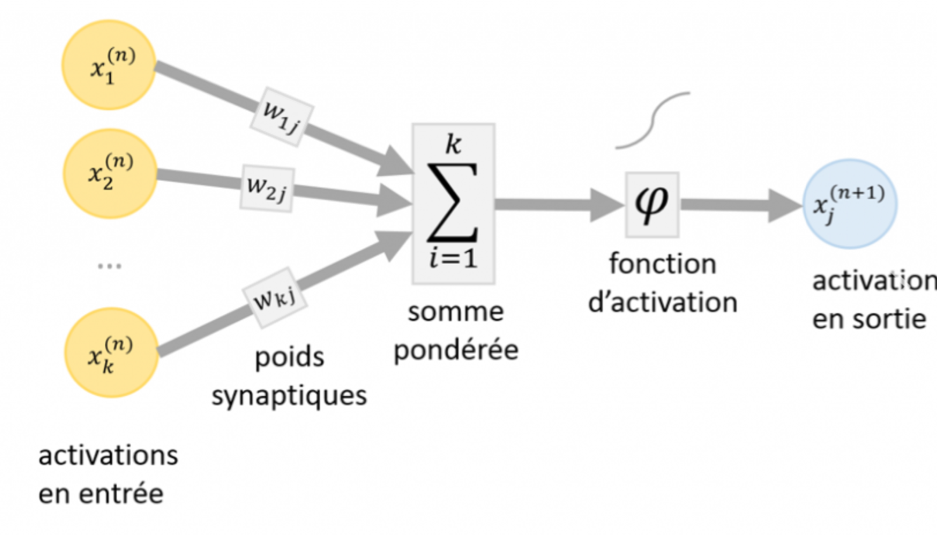

In [2]:
from IPython.display import Image
Image(filename='../pictures/PerceptronSimple.png', width=500, height=20)

## Plusieurs perceptron Simple

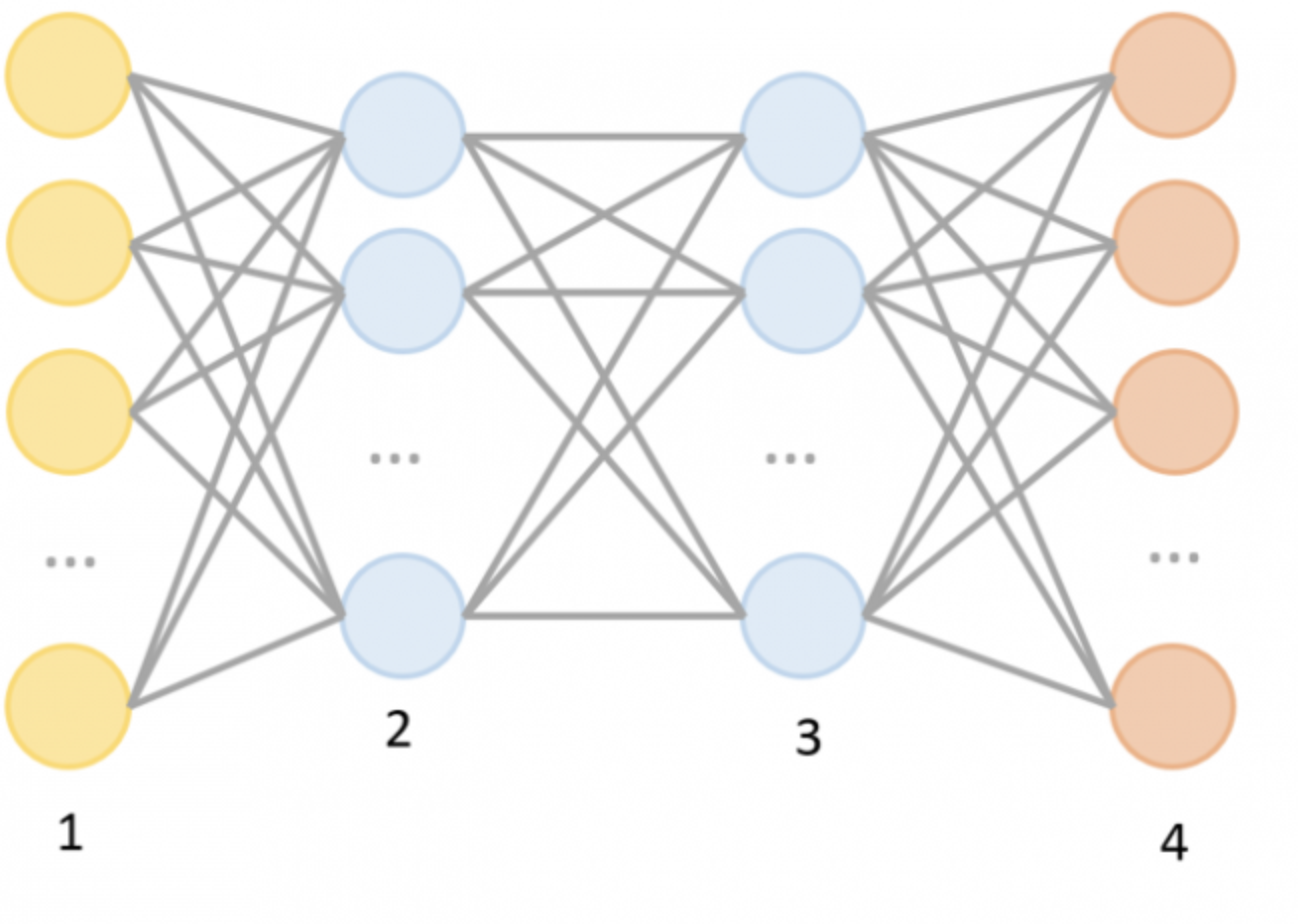

In [3]:
from IPython.display import Image
Image(filename='../pictures/MLP.png', width=500, height=20)

# Déclaration et préparation des données d'entrainement

## charge et prépare le dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a251c2208>,
      dtype=object)

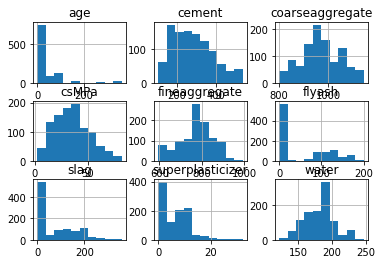

In [4]:
# load and prépare dataset
# Charge et prépare le dataset
dataset = numpy.genfromtxt("../dataset/Concrete_Data_Yeh.csv", delimiter=",",skip_header=1)
readData = pd.read_csv("../dataset/Concrete_Data_Yeh.csv", delimiter=",")
readData.head()
readData.hist()

In [5]:
pyplot.show()

## Preprocessing

In [6]:
#Input
X = dataset[:,0:8]

#Normalization of data
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(X)

# Run the normalizer on the dataframe
X = pd.DataFrame(x_scaled)

# View the dataframe
X

,0,1,2,3,4,5,6,7
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264
5,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.244505
6,0.634703,0.264329,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000
7,0.634703,0.264329,0.000000,0.848243,0.000000,0.380814,0.000000,0.074176
8,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176
9,0.851598,0.000000,0.000000,0.848243,0.000000,0.380814,0.000000,0.074176


In [7]:
#OutPut predict
Y = dataset[:,8]
Y

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

### Découpage pour équibrer le training et test

In [8]:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#decoupage facon equilibré par rapport a y 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=40)

In [9]:
print(len(X))#taille de X
print(len(X_test))#taille test 30%
print(len(X_train))#taille d'entrainment 70%

1030
309
721


In [ ]:
#X_train

In [ ]:
#X_test

In [ ]:
#Y_train

In [ ]:
#Y_test

## 1. Defini le réseau

In [10]:
# create model
model = Sequential()

In [11]:
#The first layer,8 input variables
#initialize the network weights to a small random number generated from :
# uniform : in this case between 0 and 0.05 because that is the default uniform weight initialization in Keras
# normal : for small random numbers generated from a Gaussian distribution.

model.add(Dense(4, input_dim=8, kernel_initializer='normal', activation='tanh'))

In [12]:
#model.add(Dropout(0.5))

In [13]:
#second hidden layer has 8 neurons
model.add(Dense(8, kernel_initializer='normal', activation='tanh'))

In [14]:
#3 hidden layer has 8 neurons
#model.add(Dense(8, kernel_initializer='normal', activation='sigmoid'))

In [15]:
#model.add(Dropout(0.5))

In [16]:
#output layer has 1 neuron
model.add(Dense(1, activation='linear'))

## 2. compile le réseau

In [17]:
model.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

#Régression : erreur quadratique moyenne ou « MSE ».
#Stochastique Descente du Gradient ou « sgd » qui nécessite la mise au point d'un taux d'apprentissage et dynamique.
#ADAM ou « adam » qui nécessite le réglage de la vitesse d'apprentissage.
#RMSprop ou « rmsprop » qui nécessite le réglage de la vitesse d'apprentissage.

## 3. construit le réseau

In [18]:
experiment_id = "7_Layer_MLP_1000_tanh_surapp2/"
tb_callback = keras.callbacks.TensorBoard('./logs/' + experiment_id)

In [19]:
# Fit the model
# Construction du modele
model.fit(X_train,Y_train, epochs=2000, verbose=0, callbacks = [tb_callback])

## 4. evalue le réseau

In [20]:
#evaluate the network
loss, accuracy = model.evaluate(X_train, Y_train)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

721/721 [==============================] - 0s 72us/step

Loss: 33.04, Accuracy: 0.14%


## 5. Prédiction

In [21]:
probabilities = model.predict(X_test)
diff = [len(Y_test)]
# round predictions
# show the inputs and predicted outputs
for i in range(len(Y_test)):
    print("Y=%s, Predicted=%s" % (Y_test[i], probabilities[i]))
    diff.append(abs((probabilities[i] - Y_test[i]) / Y_test[i] * 100))

Y=11.47, Predicted=[10.909895]
Y=32.66, Predicted=[34.273315]
Y=40.86, Predicted=[34.92707]
Y=31.9, Predicted=[35.79226]
Y=44.21, Predicted=[40.720528]
Y=74.5, Predicted=[68.80037]
Y=12.46, Predicted=[17.038689]
Y=47.81, Predicted=[40.80296]
Y=79.99, Predicted=[58.70838]
Y=59.76, Predicted=[39.852974]
Y=51.86, Predicted=[53.610195]
Y=11.98, Predicted=[14.86767]
Y=49.2, Predicted=[39.355286]
Y=35.23, Predicted=[28.457169]
Y=40.23, Predicted=[38.425957]
Y=50.08, Predicted=[52.674706]
Y=39.38, Predicted=[54.303696]
Y=21.95, Predicted=[22.274143]
Y=56.63, Predicted=[46.52395]
Y=82.6, Predicted=[69.05557]
Y=64.3, Predicted=[68.39516]
Y=10.03, Predicted=[12.479663]
Y=59.49, Predicted=[47.411797]
Y=13.52, Predicted=[13.060118]
Y=15.62, Predicted=[13.128228]
Y=33.54, Predicted=[34.604347]
Y=37.43, Predicted=[33.66636]
Y=20.73, Predicted=[15.41894]
Y=32.82, Predicted=[27.328915]
Y=33.76, Predicted=[43.074364]
Y=4.57, Predicted=[9.214515]
Y=12.45, Predicted=[14.168262]
Y=38.46, Predicted=[38.963

In [22]:
diff

[309,
 array([4.8832197], dtype=float32),
 array([4.939729], dtype=float32),
 array([14.520142], dtype=float32),
 array([12.201441], dtype=float32),
 array([7.8929462], dtype=float32),
 array([7.650511], dtype=float32),
 array([36.7471], dtype=float32),
 array([14.656017], dtype=float32),
 array([26.605347], dtype=float32),
 array([33.31162], dtype=float32),
 array([3.3748448], dtype=float32),
 array([24.104095], dtype=float32),
 array([20.009583], dtype=float32),
 array([19.224613], dtype=float32),
 array([4.484322], dtype=float32),
 array([5.1811175], dtype=float32),
 array([37.896633], dtype=float32),
 array([1.476731], dtype=float32),
 array([17.845757], dtype=float32),
 array([16.39761], dtype=float32),
 array([6.3688235], dtype=float32),
 array([24.423363], dtype=float32),
 array([20.302916], dtype=float32),
 array([3.4014993], dtype=float32),
 array([15.952444], dtype=float32),
 array([3.173364], dtype=float32),
 array([10.055146], dtype=float32),
 array([25.620165], dtype=float

## 6. Comparaison Train et Predict

In [23]:
moyen = sum(diff) / float(len(diff))

In [24]:
moyen

array([17.663818], dtype=float32)